In [1]:
from text2brick.models import BrickRef
from text2brick.managers import SingleBrickLegoWorldManager
from text2brick.gym import LegoEnv
from text2brick.utils.WorldDataUtils import format_ldraw, save_ldr
from text2brick.dataset.dataset import Dataset
from text2brick.utils.ImageUtils import image_upscale, IoU

In [2]:
mapping_array_l = [
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 0, 0]
]

mapping_array_o = [
    [0, 1, 1, 1, 1, 0],
    [1, 1, 0, 0, 1, 1],
    [1, 1, 0, 0, 1, 1],
    [1, 1, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 0]
]

brick_2x2 = BrickRef(file_id="3003.dat", name="2x2", color=15, h=24, w=20, d=20)
lego_world = SingleBrickLegoWorldManager(mapping_array_l, brick_2x2, remove_illegal_brick_init=False)

print(lego_world.data.str_full_infos())

# illegal_bricks = lego_world.check_illegal_bricks()

# if not illegal_bricks:
#     print("\nNo illegal bricks found")

# for brick in illegal_bricks:
#     brick_info, error_msg = brick
#     print("\nIllegal Brick", brick_info)
#     print("Error", error_msg)


Lego World Bricks
id: 1 x: 0 | y: -48 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:24 | w:20 | d:20 | Connected to: [3]
id: 2 x: 20 | y: -48 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:24 | w:20 | d:20 | Connected to: [4]
id: 3 x: 0 | y: -24 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:24 | w:20 | d:20 | Connected to: [1, 5]
id: 4 x: 20 | y: -24 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:24 | w:20 | d:20 | Connected to: [2]
id: 5 x: 0 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:24 | w:20 | d:20 | Connected to: [3]


In [3]:
lego_world.data.valid_bricks

{1, 3, 5}

In [4]:
save_ldr(lego_world.data, "test_file_2x2_o")

In [5]:
env = LegoEnv(10)

# Reset and observe the initial state
# print("Initial state:")
# print(env.reset())

# Take an action
action = env.generate_random_action()
observation, reward, done, info = env.step(action)

observation, reward, done, info = env.step((1, 0))
observation, reward, done, info = env.step((9, 0))
observation, reward, done, info = env.step((8, 1))
print(observation)

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]]


In [6]:
dataset = Dataset()

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 

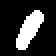

In [8]:
array1, image1 = dataset.sample()
array2, image2 = dataset.sample_truncated_horizontally(12)
array3, image3 = dataset.sample_truncated_vertically(16)
print(array1)
image1 = image_upscale(image1, 2)
print(f"IoU between image 1 and 2: {IoU(array1, array2)}")
image1